### Setup

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

## Working with larger databases

In this mission we'll learn some new techniques to work with the sort of databases that most businesses will use. We'll be working with a modified version of a database called Chinook. The Chinook database contains information about a fictional digital music shop - kind of like a mini-iTunes store.

The Chinook database contains information about the artists, songs, and albums from the music shop, as well as information on the shop's employees, customers, and the customers purchases. This information is contained in eleven tables. Like with our Factbook database, a schema diagram will help us understand the available columns and the structure of the data. Here's a schema diagram for the Chinook database:

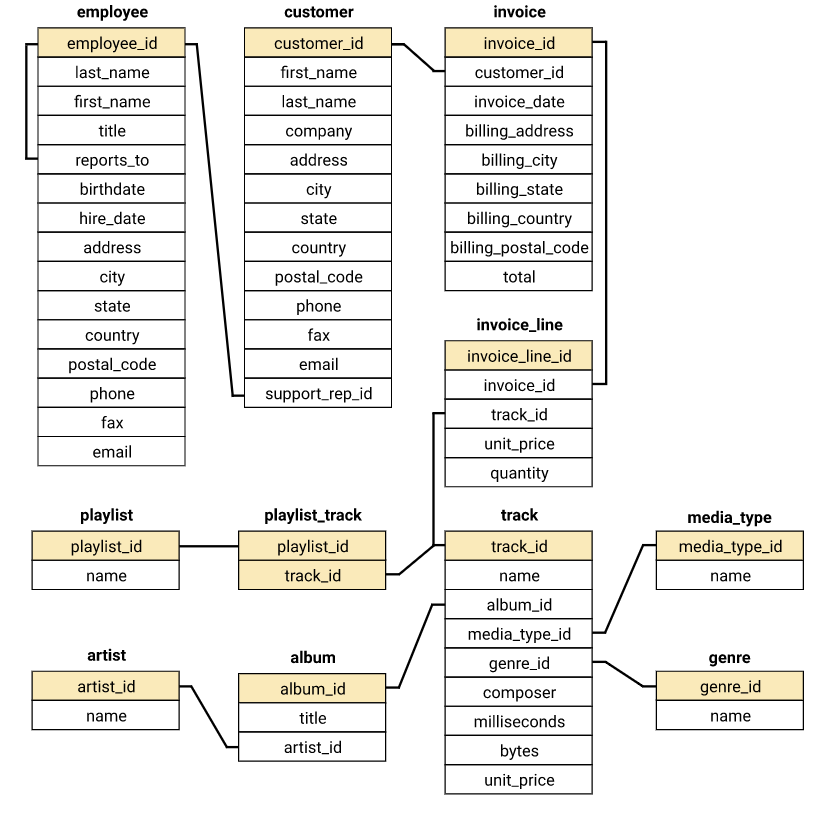

Looking at all those tables can be overwhelming at first, but generally speaking we will only need to think about the specific tables that have the data we require and their connections. Before we look at some specific tables, let's take a moment to understand the different parts of the schema diagram.

Tables names are shown in bold, with the columns in each table listed below.
Each table has one or more columns with shading, which indicates those columns are a primary key. We'll learn more about primary keys in a later mission, but for now all you need to know is that each row's primary key must be unique.
Relationships between tables are shown using lines between the tables. The lines indicate which columns are related. You may notice that at least one 'end' of the relationship will be a primary key.
As you work through this mission, you may need to refer back to the schema diagram. This is normal, so don't be bothered when that happens. It can also be helpful to write a simple query to check the column names and some example data from any of the tables, for instance:

In [2]:
%%sql

SELECT * FROM album LIMIT 3;

 * sqlite:///chinook.db
Done.


album_id,title,artist_id
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2
3,Restless and Wild,2


## Joining three tables

Our first task is to gather some information on a specific purchase. For one single purchase (invoice_id) we want to know, for each track purchased:

- The id of the track.
- The name of the track.
- The name of media type of the track.
- The price that the customer paid for the track.
- The quantity of the track that was purchased.

To gather this information, we will need to write a query that joins 3 tables: invoice_line, track, and media_type. To make this easier, a schema diagram of just these three tables is below:

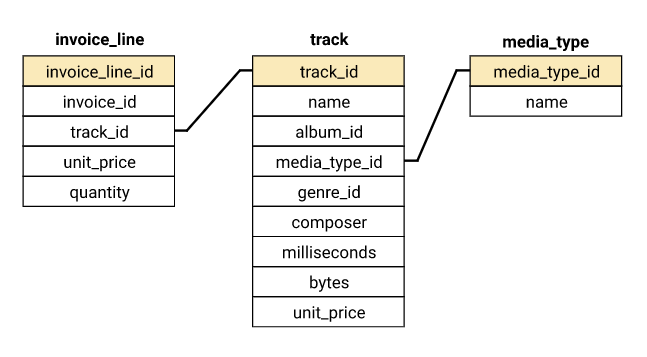

If you didn't explore these 3 tables in the previous screen, take a moment now to explore them:

- For each of invoice_line, track, and media_type:
    - Write a simple query to view the first few rows of each of these tables.
    - Look at the result of the query to become familiar with the columns and what sort of data we are working with.


In [3]:
%%sql 

SELECT * FROM invoice_line LIMIT 3;

 * sqlite:///chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
1,1,1158,0.99,1
2,1,1159,0.99,1
3,1,1160,0.99,1


In [4]:
%%sql 

SELECT * FROM track LIMIT 3;

 * sqlite:///chinook.db
Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99


In [5]:
%%sql 

SELECT * FROM media_type LIMIT 3;

 * sqlite:///chinook.db
Done.


media_type_id,name
1,MPEG audio file
2,Protected AAC audio file
3,Protected MPEG-4 video file


Now that you're familiar with the data, we can look at the syntax for joining data from more than 2 tables.`

```
SELECT [column_names] FROM [table_name_one]
[join_type] JOIN [table_name_two] ON [join_constraint]
[join_type] JOIN [table_name_three] ON [join_constraint];
```

Joining multiple tables is as simple as adding an extra JOIN clause. The SQL engine interprets joins **in order**, so the first join will be executed, and then the second join will be executed against the result of the first join. Because of this, we can first build our query in steps:

- with 0 joins.
- with 1 join.
- with 2 joins.

We will use the `invoice_line` table in our FROM clause, since it contains 3 of the 5 columns we want in our final query. You don't have to follow this pattern but if you're not sure, it's a good place to start. Since our task involves looking for information about a specific invoice_id, let's choose an invoice_id value of 3. Selecting all lines from invoice_line with an invoice_id is straightforward:

In [6]:
%%sql

SELECT * FROM invoice_line
WHERE invoice_id = 3;

 * sqlite:///chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
27,3,2516,0.99,1
28,3,2646,0.99,1


Now we can use an inner join to add the data from the track table.

In [7]:
%%sql 

SELECT * FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
WHERE invoice_id = 3;

 * sqlite:///chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id_1,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_1
27,3,2516,0.99,1,2516,Black Hole Sun,203,1,1,Soundgarden,320365,10425229,0.99
28,3,2646,0.99,1,2646,I Looked At You,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Jim Morrison",142080,4663988,0.99


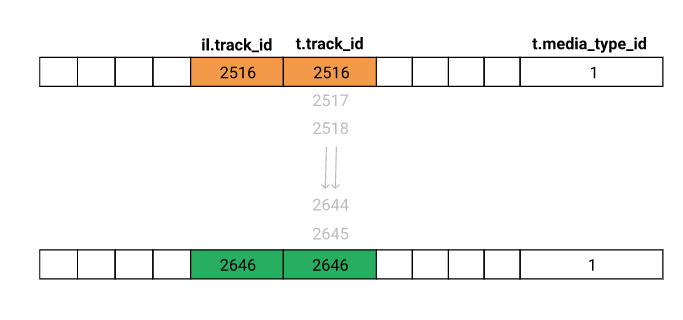

Next, we add our second join to add the data from the media_type table.

In [8]:
%%sql 

SELECT * FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE invoice_id = 3;

 * sqlite:///chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity,track_id_1,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price_1,media_type_id_1,name_1
27,3,2516,0.99,1,2516,Black Hole Sun,203,1,1,Soundgarden,320365,10425229,0.99,1,MPEG audio file
28,3,2646,0.99,1,2646,I Looked At You,214,1,1,"Robby Krieger, Ray Manzarek, John Densmore, Jim Morrison",142080,4663988,0.99,1,MPEG audio file


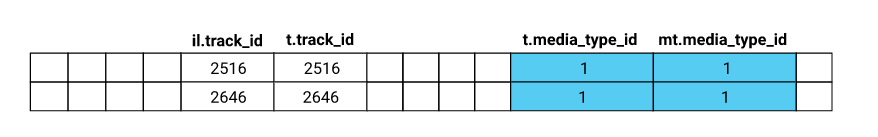

The last step is to alter the SELECT clause to include only the columns we require - let's do that now with a different order.

*Write a query that gathers data about the invoice with an invoice_id of 4. Include the following columns in order:*

- *The id of the track, track_id.*
- *The name of the track, track_name.*
- *The name of media type of the track, track_type.*
- *The price that the customer paid for the track, unit_price.*
- *The quantity of the track that was purchased, quantity.*



In [10]:
%%sql 

SELECT t.track_id track_id, 
       t.name track_name,
       mt.name track_type,
       il.unit_price unit_price,
       il.quantity quantity

FROM invoice_line il 
    INNER JOIN track t ON t.track_id = il.track_id
    INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE invoice_id = 4;

 * sqlite:///chinook.db
Done.


track_id,track_name,track_type,unit_price,quantity
3448,"Lamentations of Jeremiah, First Set \ Incipit Lamentatio",Protected AAC audio file,0.99,1
2560,Violent Pornography,MPEG audio file,0.99,1
3336,War Pigs,Purchased AAC audio file,0.99,1
829,Let's Get Rocked,MPEG audio file,0.99,1
1872,Attitude,MPEG audio file,0.99,1
748,Dealer,MPEG audio file,0.99,1
1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
2514,Spoonman,MPEG audio file,0.99,1


## Joining more than three tables

Let's extend the query we wrote in the previous screen by adding the artist for each track. If you examine the schema, you'll notice that the data for the artist's name is not directly connected to the track table.

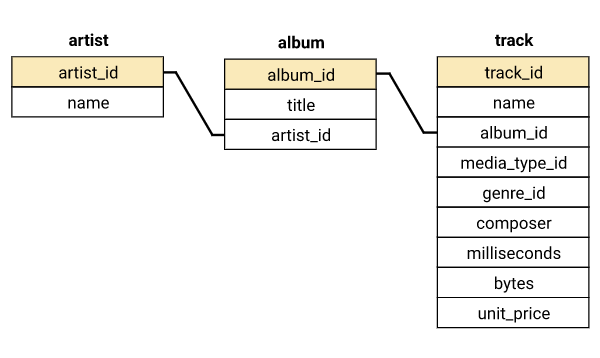

In this case, we will need to join two new tables to our existing query:

- `artist`, which contains the artist name data that we need
- `album`, which has a column common to each of the artist and track tables which allows us to join those two tables.

Our select clause won't actually use any of the columns from the album table. This is quite common when writing more complex queries because it will let you join to another table.

The query from the previous screen is included here:

In [11]:
%%sql 

SELECT
    il.track_id,
    t.name track_name,
    mt.name track_type,
    il.unit_price,
    il.quantity
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE il.invoice_id = 4;

 * sqlite:///chinook.db
Done.


track_id,track_name,track_type,unit_price,quantity
3448,"Lamentations of Jeremiah, First Set \ Incipit Lamentatio",Protected AAC audio file,0.99,1
2560,Violent Pornography,MPEG audio file,0.99,1
3336,War Pigs,Purchased AAC audio file,0.99,1
829,Let's Get Rocked,MPEG audio file,0.99,1
1872,Attitude,MPEG audio file,0.99,1
748,Dealer,MPEG audio file,0.99,1
1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1
2514,Spoonman,MPEG audio file,0.99,1


*Add a column containing the artists name to the query from the previous screen.*
- *The column should be called artist_name*
- *The column should be placed between track_name and track_type*

In [13]:
%%sql 

SELECT
    il.track_id,
    t.name track_name,
    mt.name track_type,
    il.unit_price,
    il.quantity,
    ar.name artist_name
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN album a ON t.album_id = a.album_id
INNER JOIN artist ar ON a.artist_id = ar.artist_id
INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id
WHERE il.invoice_id = 4;

 * sqlite:///chinook.db
Done.


track_id,track_name,track_type,unit_price,quantity,artist_name
3448,"Lamentations of Jeremiah, First Set \ Incipit Lamentatio",Protected AAC audio file,0.99,1,The King's Singers
2560,Violent Pornography,MPEG audio file,0.99,1,System Of A Down
3336,War Pigs,Purchased AAC audio file,0.99,1,Cake
829,Let's Get Rocked,MPEG audio file,0.99,1,Def Leppard
1872,Attitude,MPEG audio file,0.99,1,Metallica
748,Dealer,MPEG audio file,0.99,1,Deep Purple
1778,You're What's Happening (In The World Today),MPEG audio file,0.99,1,Marvin Gaye
2514,Spoonman,MPEG audio file,0.99,1,Soundgarden


## Combining multiple joins with subqueries

Because the invoice_line table contains each individual song from each customer purchase, it contains information about which songs are purchased the most. We can use the table to find out which artists are purchased the most. Specifically, **what we want to produce is a query that lists the top 10 artists, calculated by the number of times a track by that artist has been purchased**.

We'll need to use a **GROUP BY** clause to get the number of tracks purchased from each artist, but before we do we'll have to join a few tables. As we start thinking about how we will write this query, we can look at the database schema from the first screen of this mission and think about what tables we will need to include.

Writing our query would be a *lot easier* **if** we had one table that contained both the track.track_id and the artist.name columns. We can write a subquery that creates this table for us, and then use that subquery to calculate our answer. This means our process will be:

- Write a subquery that produces a table with track.track_id and artist.name,
- Join that subquery to the invoice_line table,
- Use a GROUP BY statement to calculate the number of times each artist has had a track purchased, and find the top 10.

We can write our subquery by joining album to track and then artist to album, just like we did in the previous screen. We'll add an ORDER BY and LIMIT to our query so we're only looking at manageable sample of the data, but we'll remove it when we move to the next step.

In [14]:
%%sql

SELECT
    t.track_id,
    ar.name artist_name
FROM track t
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
ORDER BY 1 LIMIT 5;

 * sqlite:///chinook.db
Done.


track_id,artist_name
1,AC/DC
2,Accept
3,Accept
4,Accept
5,Accept


Next, we need to join this subquery to our invoice_line table. We'll give our subquery an alias ta for 'track artist' to make it easier to refer to. Again, we'll add an ORDER BY and LIMIT statement to this step so our output is more manageable.

In [15]:
%%sql

SELECT
    il.invoice_line_id,
    il.track_id,
    ta.artist_name
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
ORDER BY 1 LIMIT 5;

 * sqlite:///chinook.db
Done.


invoice_line_id,track_id,artist_name
1,1158,Guns N' Roses
2,1159,Guns N' Roses
3,1160,Guns N' Roses
4,1161,Guns N' Roses
5,1162,Guns N' Roses


At first it might look like we've done something wrong, because the artist for all rows is Guns N' Roses, but that's because the very first order in our table is a customer who purchased an entire Guns N' Roses album! All that remains now is for us to add our GROUP BY clause, remove the extra columns and use ORDER BY and LIMIT clauses to select the 10 most popular artists.

In [16]:
%%sql

SELECT
    ta.artist_name artist,
    COUNT(*) tracks_purchased
FROM invoice_line il
INNER JOIN (
            SELECT
                t.track_id,
                ar.name artist_name
            FROM track t
            INNER JOIN album al ON al.album_id = t.album_id
            INNER JOIN artist ar ON ar.artist_id = al.artist_id
           ) ta
           ON ta.track_id = il.track_id
GROUP BY 1
ORDER BY 2 DESC LIMIT 10;

 * sqlite:///chinook.db
Done.


artist,tracks_purchased
Queen,192
Jimi Hendrix,187
Red Hot Chili Peppers,130
Nirvana,130
Pearl Jam,129
Guns N' Roses,124
AC/DC,124
Foo Fighters,121
The Rolling Stones,117
Metallica,106


You can use a similar technique to work out from which albums the most songs have been purchased.

*Write a query that returns the top 5 albums, as calculated by the number of times a track from that album has been purchased. Your query should be sorted from most tracks purchased to least tracks purchased and return the following columns, in order:*

- *album, the title of the album*
- *artist, the artist who produced the album*
- *tracks_purchased the total number of tracks purchased from that album*

In [19]:
%%sql

SELECT al_tr.title AS album,
       al_tr.artist AS artist,
       COUNT(*) tracks_purchased
    FROM invoice_line il 
        INNER JOIN (SELECT al.title title,
                           ar.name artist,
                           t.track_id track_id
                    FROM track t INNER JOIN album al ON t.album_id = al.album_id
                                 INNER JOIN artist ar ON al.artist_id = ar.artist_id
                   ) al_tr
            ON il.track_id = al_tr.track_id
    GROUP BY album
    ORDER BY tracks_purchased DESC
    LIMIT 5;

 * sqlite:///chinook.db
Done.


album,artist,tracks_purchased
Are You Experienced?,Jimi Hendrix,187
Faceless,Godsmack,96
Mezmerize,System Of A Down,93
Get Born,JET,90
The Doors,The Doors,83


## Recursive joins

In some cases, there can be a relation between two columns within the same table. We can see that in our employee table, where there is a reports_to column that has a relation to the employee_id column within the same table.

The reports_to column identifies each employee's supervisor. If we wanted to create a report of each employee and their supervisor's name, we would need some way of **joining a table to itself**. Doing this is called a **recursive join**.

Technically, a recursive join will use one of the other standard joins— usually an INNER JOIN or LEFT JOIN since these are the most commonly used joins— and aliases to distinguish between the table on each side of the join. Here's a simple example of a recursive join in action:

In [20]:
%%sql

SELECT
    e1.employee_id,
    e2.employee_id supervisor_id
FROM employee e1
INNER JOIN employee e2 on e1.reports_to = e2.employee_id
LIMIT 4;

 * sqlite:///chinook.db
Done.


employee_id,supervisor_id
2,1
6,1
3,2
4,2


To make our report more meaningful, we'll need to add some extra columns. One thing that would be nice is being able to combine the `first_name` and `last_name columns` into a single column. We can do that using the **concatenate operator**: `||`.

You can explore how the concatenate operator works by writing a simple query:

In [21]:
%%sql

SELECT ("this" || "is" || "my" || "string");

 * sqlite:///chinook.db
Done.


"(""this"" || ""is"" || ""my"" || ""string"")"
thisismystring


Here are a few different examples of using concatenation, this time with columns from the album table:

In [24]:
%%sql

SELECT
    album_id,
    artist_id,
    "album id is" || album_id col_1,
    "artist id is" || artist_id col2,
    album_id || artist_id col3
FROM album LIMIT 3;

 * sqlite:///chinook.db
Done.


album_id,artist_id,col_1,col2,col3
1,1,album id is1,artist id is1,11
4,1,album id is4,artist id is1,41
2,2,album id is2,artist id is2,22


You'll notice that the SQL engine will concatenate multiple columns, columns with a string, and that the SQL engine handles converting different types where needed.

*Let's use what we've learned about recursive joins and the concatenation operator to create a report about employees and their supervisors.*

*Write a query that returns information about each employee and their supervisor.*

- *The report should include employees even if they do not report to another employee.*
- *The report should be sorted alphabetically by the employee_name column.*
- *Your query should return the following columns, in order:*
    - *employee_name - containing the first_name and last_name columns separated by a space, eg Luke Skywalker*
    - *employee_title - the title of that employee*
    - *supervisor_name - the first and last name of the person the employee reports to, in the same format as employee_name*
    - *supervisor_title - the title of the person the employee reports to*

In [25]:
%%sql

SELECT e1.first_name || ' ' || e1.last_name AS employee_name,
       e1.title AS employee_title,
       e2.first_name || ' ' || e2.last_name AS supervisor_name,
       e2.title AS supervisor_title
    FROM employee e1 LEFT JOIN employee e2 ON e1.reports_to = e2.employee_id
    ORDER BY 1
    

 * sqlite:///chinook.db
Done.


employee_name,employee_title,supervisor_name,supervisor_title
Andrew Adams,General Manager,None,None
Jane Peacock,Sales Support Agent,Nancy Edwards,Sales Manager
Laura Callahan,IT Staff,Michael Mitchell,IT Manager
Margaret Park,Sales Support Agent,Nancy Edwards,Sales Manager
Michael Mitchell,IT Manager,Andrew Adams,General Manager
Nancy Edwards,Sales Manager,Andrew Adams,General Manager
Robert King,IT Staff,Michael Mitchell,IT Manager
Steve Johnson,Sales Support Agent,Nancy Edwards,Sales Manager


## Pattern matching using like

Let's say you're working as a sales support agent for Chinook, and you get back from lunch and see that one of your colleagues has left a phone message on your desk: "Call Jen". Writing a query to get this information out of the database might seem simple at first:

In [26]:
%%sql

SELECT
    first_name,
    last_name,
    phone
FROM customer
WHERE first_name = "Jen";

 * sqlite:///chinook.db
Done.


first_name,last_name,phone


No rows were returned by your query! Suddenly you realize— the name in the database might not be exactly "Jen", it might be Jenny, Jennifer, Jenna, or something else. Rather than having to keep trying different combinations, we can use the `LIKE` operator to find pattern matches. The syntax for LIKE is as follows:

`WHERE [column_name] LIKE "[pattern]"`

Your pattern should be the substring you want to match for, and one or more % characters:

- %Jen - will match Jen at the end of a string, eg Sarah-Jen
- Jen% - will match Jen at the start of a string, eg Jenny
- %Jen% - will match Jen anywhere within the string, eg Kris Jenner

We'll use the last pattern to give ourselves the best chance of a match:

In [27]:
%%sql

SELECT
    first_name,
    last_name,
    phone
FROM customer
WHERE first_name LIKE "%Jen%";

 * sqlite:///chinook.db
Done.


first_name,last_name,phone
Jennifer,Peterson,+1 (604) 688-2255


Perfect - we have found one match and have Jennifer's number so we can return her call.

Keep in mind that in SQLite LIKE is **case insensitive**, so LIKE "%jen%" will match Jen and JEN and JeN. Other flavors of SQL may be case sensitive, so you may need to use the LOWER() function to get a case insensitive match.

Let's use LIKE to find a different customer from our database.

*You have just returned from lunch to see another phone message on your desk: "Call Belle."*

- *Write a query that finds the contact details of a customer with a first_name containing Belle from the database. Your query should include the following columns, in order:* 
    - *first_name*
    - *last_name*
    - *phone*

In [29]:
%%sql

SELECT first_name, last_name, phone
   FROM customer
   WHERE first_name LIKE "%Belle%"

 * sqlite:///chinook.db
Done.


first_name,last_name,phone
Isabelle,Mercier,+33 03 80 73 66 99


## Generating columns with the case statement

Sometimes, you'll want to add some sort of categorization to your query. Let's say we wanted to generate a report summarizing each customer's purchases. It might be nice to create a column that puts each customer into a category:

- small spender - If the customer's total purchases are less than $40.
- big spender - If the customer's total purchases are greater than $100.
- regular - If the customer's total purchases are between $40 and $100 (inclusive). 

To achieve this, we'll need to use the case statement. The case statement acts like a series of if/then options for a new column. The syntax for CASE is:

```
CASE
    WHEN [comparison_1] THEN [value_1]
    WHEN [comparison_2] THEN [value_2]
    ELSE [value_3]
    END
    AS [new_column_name]
```

There can be 1 or more WHEN lines, and the ELSE line is optional— without it, rows that don't match any WHEN will be assigned a null value. Let's start by looking at a simple example. The media_type table contains the name of five different media types:

In [30]:
%%sql

SELECT * FROM media_type

 * sqlite:///chinook.db
Done.


media_type_id,name
1,MPEG audio file
2,Protected AAC audio file
3,Protected MPEG-4 video file
4,Purchased AAC audio file
5,AAC audio file


Let's look at how we can use CASE to add a new column protected, which indicates whether each media type is protected.

In [31]:
%%sql

SELECT
    media_type_id,
    name,
    CASE
        WHEN name LIKE '%Protected%' THEN 1
        ELSE 0
        END
        AS protected
FROM media_type;

 * sqlite:///chinook.db
Done.


media_type_id,name,protected
1,MPEG audio file,0
2,Protected AAC audio file,1
3,Protected MPEG-4 video file,1
4,Purchased AAC audio file,0
5,AAC audio file,0


In this example, our CASE statement has a single WHEN which looks for a partial match of the string Protected in the name column. Any rows with a match get a value of 1; all other rows get 0.

Let's now put CASE into practice using our initial scenario, where we want to categorize customers by their purchase history.

You'll need to know that you can't use aliases in the WHEN line, so when writing a CASE statement that deals with aggregate functions, you will need to include the aggregate function in each WHEN line.

*Write a query that summarizes the purchases of each customer. For the purposes of this exercise, we do not have any two customers with the same name.* 

- Your query should include the following columns, in order:
    - customer_name - containing the first_name and last_name columns separated by a space, eg Luke Skywalker.
    - number_of_purchases, counting the number of purchases made by each customer.
    - total_spent - the total sum of money spent by each customer.
    - customer_category - a column that categorizes the customer based on their total purchases. The column should contain the following values:
        - small spender - If the customer's total purchases are less than \$40.
        - big spender - If the customer's total purchases are greater than \$100.
        - regular - If the customer's total purchases are between \$40 and \\$100 (inclusive).

- Order your results by the customer_name column.

In [33]:
%%sql

SELECT c.first_name || ' ' || c.last_name AS customer_name,
       COUNT(invoice_id) AS number_of_purchases,
       SUM(i.total) AS total_spent,
       CASE
          WHEN SUM(total) < 40 THEN 'small spender'
          WHEN SUM(total) <= 100 THEN 'regular'
          ELSE 'big spender'
        END AS customer_category
    FROM customer c INNER JOIN invoice i ON c.customer_id = i.customer_id
    GROUP BY i.customer_id
    ORDER BY 1
    LIMIT 10

 * sqlite:///chinook.db
Done.


customer_name,number_of_purchases,total_spent,customer_category
Aaron Mitchell,8,70.28999999999999,regular
Alexandre Rocha,10,69.3,regular
Astrid Gruber,9,69.3,regular
Bjørn Hansen,9,72.27000000000001,regular
Camille Bernard,9,79.2,regular
Daan Peeters,7,60.38999999999999,regular
Dan Miller,12,95.03999999999999,regular
Diego Gutiérrez,5,39.6,small spender
Dominique Lefebvre,9,72.27,regular
Eduardo Martins,12,60.39,regular
